# Narrow Band e Wide Band

( https://medium.com/@ongzhixuan/exploring-the-short-time-fourier-transform-analyzing-time-varying-audio-signals-98157d1b9a12 )

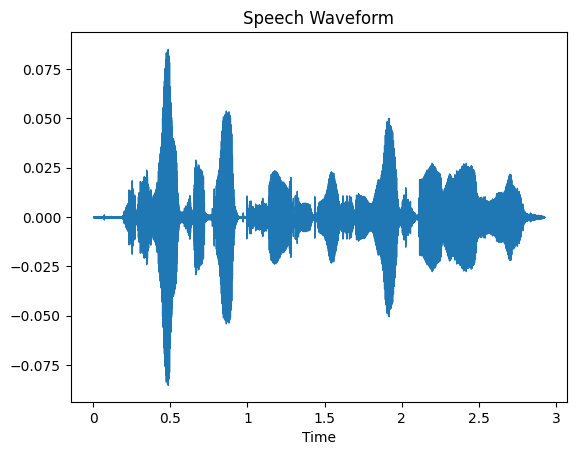

In [13]:
import librosa
import matplotlib.pyplot as plt

filename = "LDC93S1.wav"
signal, sample_rate = librosa.load(filename, sr=16000)

# Plot the waveform
plt.figure()
librosa.display.waveshow(signal, sr=sample_rate)
plt.title("Speech Waveform")
plt.show()

In [14]:
sample_rate

16000

Narrow e Wideband, basta analizzare il pitch

Per andare a mostrare wideband o narrow band dobbiamo selezionare il numero di campioni da tenere in considerazione per la dimensione della finestra (su cui andare a calcolare la sftf).
- partiamo dalla fs
- il pitch è a 100 Hz
- fisso una dimensione della finestra a 30ms per esempio 
- definisco anche una window_step

In [19]:
import numpy as np

def stft(signal, window_size, hop_length):
    n_frames = 1 + (len(signal) - window_size) // hop_length
    stft_matrix = np.empty((window_size // 2 + 1, n_frames), dtype=complex)

    for i in range(n_frames):
        frame = signal[i * hop_length: i * hop_length + window_size]
        windowed_frame = frame * np.hamming(window_size)
        stft_matrix[:, i] = np.fft.rfft(windowed_frame)

    return stft_matrix

# window_size = 1024
# hop_length = 512
window_size = 200
hop_length = 100
stft_matrix = stft(signal, window_size, hop_length)

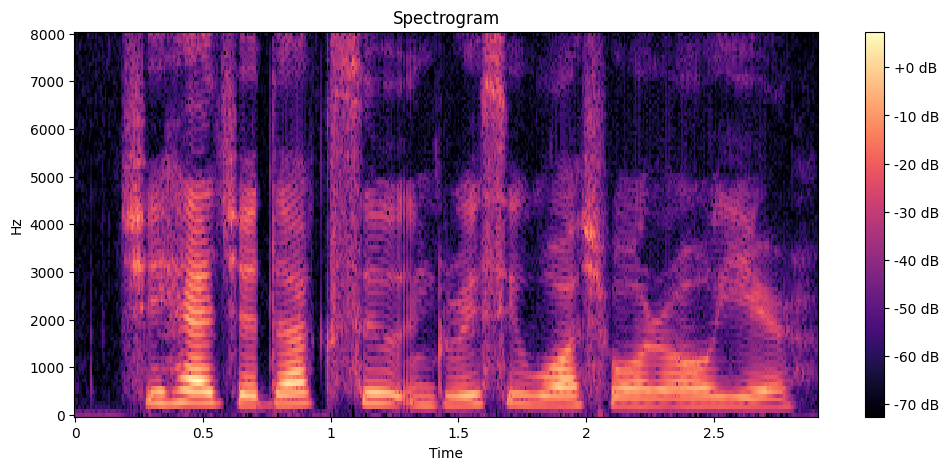

In [20]:
def plot_spectrogram(stft_matrix, sample_rate, hop_length):
    magnitude_spectrogram = np.abs(stft_matrix)
    log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="linear")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.show()

plot_spectrogram(stft_matrix, sample_rate, hop_length)

Finestre temporali più piccole ci danno la Wideband, riusciamo a vedere meglio le formanti